# Adult Census Income
Predict whether income exceeds $50K/yr based on census data https://www.kaggle.com/uciml/adult-census-income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Прогнозируемая велечина - доход (столбец income).

In [3]:
# посмотрим общую инофрмацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.notnull().describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


Пропусков в данных нет, есть категориальные признаки (object), их нужно перекодировать

In [5]:
# посмторим уникальные значения признака native.country
set(df['native.country'])

{'?',
 'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(Guam-USVI-etc)',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'Scotland',
 'South',
 'Taiwan',
 'Thailand',
 'Trinadad&Tobago',
 'United-States',
 'Vietnam',
 'Yugoslavia'}

In [6]:
# видно, что есть ? - неизвестные данные, они нам ничем не помогут, посмотрим, сколько их в датасете
arr = df.values == '?' 
np.count_nonzero(arr == True)

4262

In [7]:
# получается, в худшем случае мы удалим 1/8 датасета, если почистим строки с ?. Сделаем это
df = df.drop(df[df.values == '?'].index)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
# посмотрим на описательную статистику датафрейма по количественным признакам признакам
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# закодируем категориальные признаки используя ту же функцию, что и для первого датафрейма
def number_encode_features(data_frame):
    result = data_frame.copy()
    encoders = {} 
    for column in result.columns:
        if result.dtypes[column] == np.object:
            uniqe_vals = set(result[column])
            coder = {word:index for index, word in enumerate(uniqe_vals)}
            encoders[column] = coder
            result[column] = result[column].map(encoders[column])
    return result, encoders

df_encoded, encoders = number_encode_features(df)

In [10]:
df_encoded.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,4,132870,2,9,6,1,1,1,1,0,4356,18,5,0
3,54,4,140359,13,4,1,0,0,1,1,0,3900,40,5,0
4,41,4,264663,15,10,3,7,4,1,1,0,3900,40,5,0
5,34,4,216864,2,9,1,6,0,1,1,0,3770,45,5,0
6,38,4,150601,9,6,3,9,0,1,0,0,3770,40,5,0


In [11]:
encoders

{'workclass': {'Without-pay': 0,
  'Self-emp-not-inc': 1,
  'Self-emp-inc': 2,
  'Federal-gov': 3,
  'Private': 4,
  'Local-gov': 5,
  'State-gov': 6},
 'education': {'Prof-school': 0,
  '9th': 1,
  'HS-grad': 2,
  'Masters': 3,
  'Assoc-voc': 4,
  'Bachelors': 5,
  'Doctorate': 6,
  'Preschool': 7,
  '1st-4th': 8,
  '10th': 9,
  '5th-6th': 10,
  'Assoc-acdm': 11,
  '12th': 12,
  '7th-8th': 13,
  '11th': 14,
  'Some-college': 15},
 'marital.status': {'Married-spouse-absent': 0,
  'Divorced': 1,
  'Never-married': 2,
  'Separated': 3,
  'Married-AF-spouse': 4,
  'Married-civ-spouse': 5,
  'Widowed': 6},
 'occupation': {'Machine-op-inspct': 0,
  'Exec-managerial': 1,
  'Sales': 2,
  'Protective-serv': 3,
  'Tech-support': 4,
  'Priv-house-serv': 5,
  'Other-service': 6,
  'Prof-specialty': 7,
  'Handlers-cleaners': 8,
  'Adm-clerical': 9,
  'Craft-repair': 10,
  'Transport-moving': 11,
  'Armed-Forces': 12,
  'Farming-fishing': 13},
 'relationship': {'Unmarried': 0,
  'Not-in-family': 1,

In [12]:
#посмотрим, какие признаки больше всего влияют на доход по корреляции

df_encoded.corr()['income'].sort_values(ascending=False)

income            1.000000
marital.status    0.389865
education.num     0.335286
relationship      0.302879
age               0.241998
hours.per.week    0.229480
capital.gain      0.221196
capital.loss      0.150053
race              0.027602
fnlwgt           -0.008957
native.country   -0.016633
workclass        -0.065908
education        -0.095148
occupation       -0.130152
sex              -0.216699
Name: income, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EC1634AC88>,
      dtype=object)

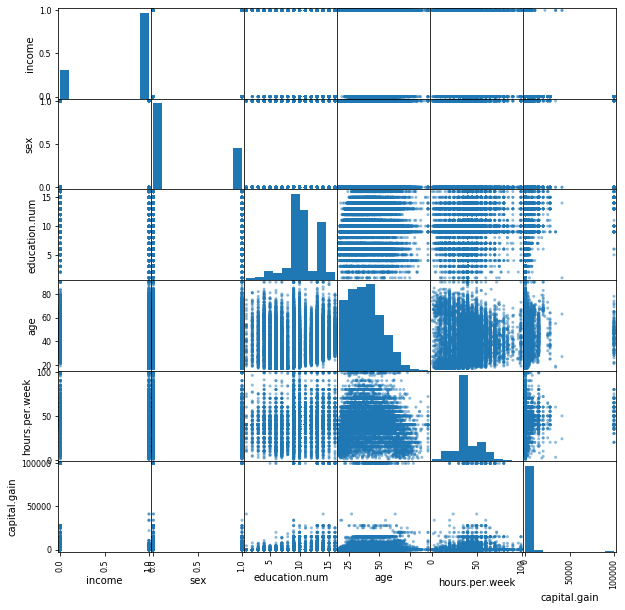

In [44]:
from pandas.plotting import scatter_matrix

at = ['income', 'sex', 'education.num', 'age', 'hours.per.week','capital.gain' ] 
scatter_matrix(df_encoded[at], figsize=(10, 10))

In [13]:
# дропнем income из датафрейма для дальнейшего анализа, сохранив в отдельную серию

Income = df_encoded['income'].copy()
df_encoded = df_encoded.drop(['income'], axis=1)
df_encoded.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,4,132870,2,9,6,1,1,1,1,0,4356,18,5
3,54,4,140359,13,4,1,0,0,1,1,0,3900,40,5
4,41,4,264663,15,10,3,7,4,1,1,0,3900,40,5
5,34,4,216864,2,9,1,6,0,1,1,0,3770,45,5
6,38,4,150601,9,6,3,9,0,1,0,0,3770,40,5


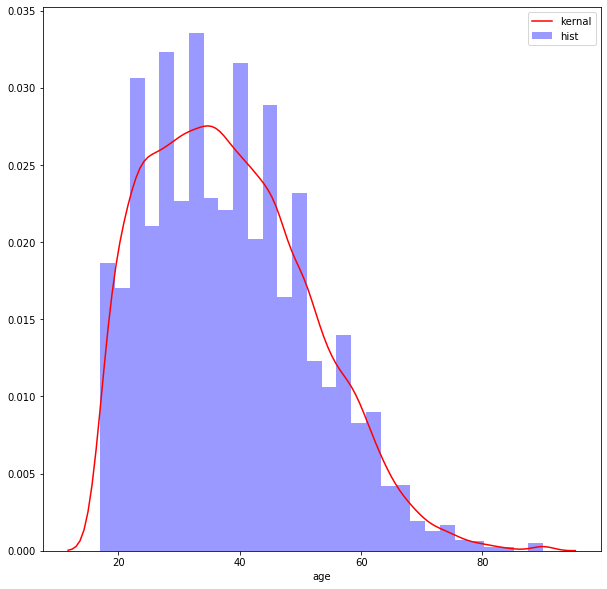

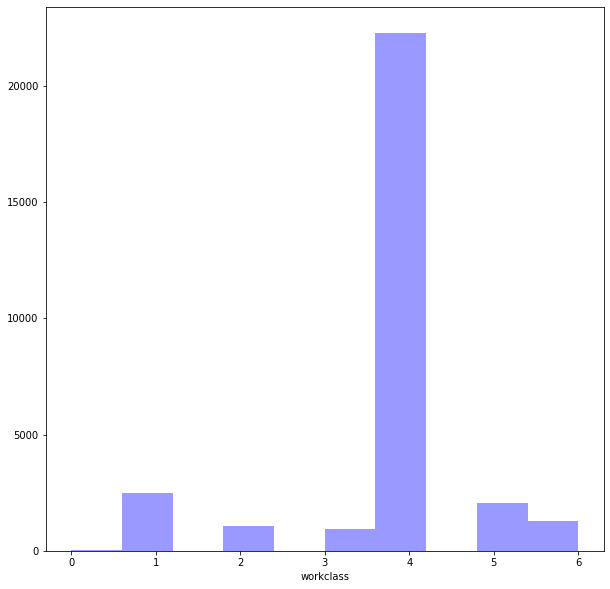

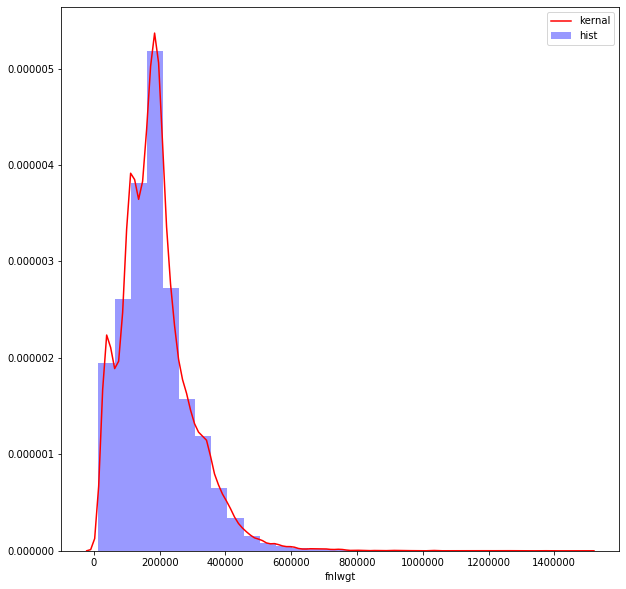

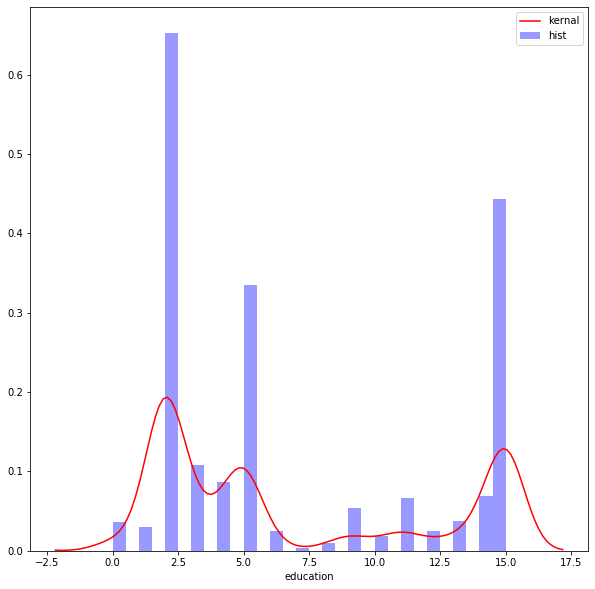

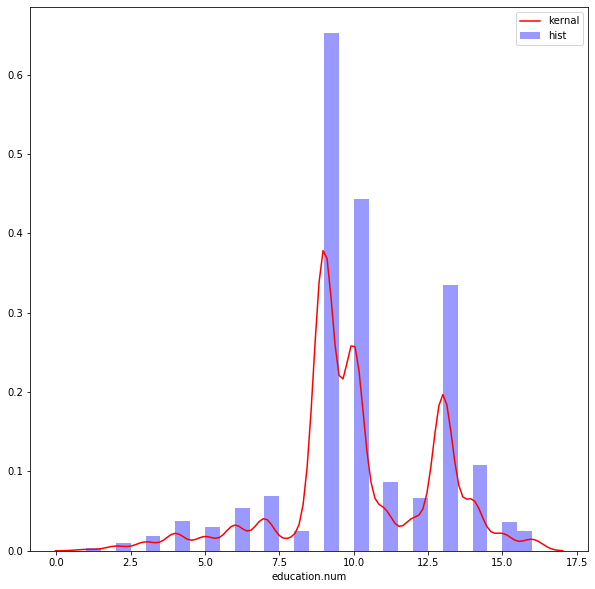

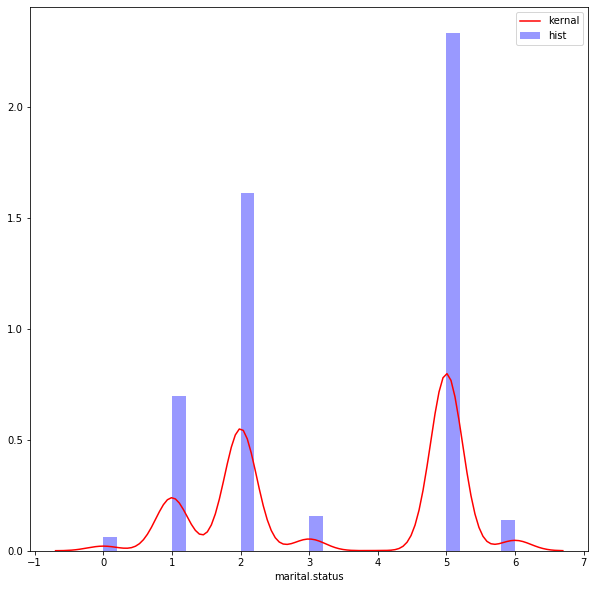

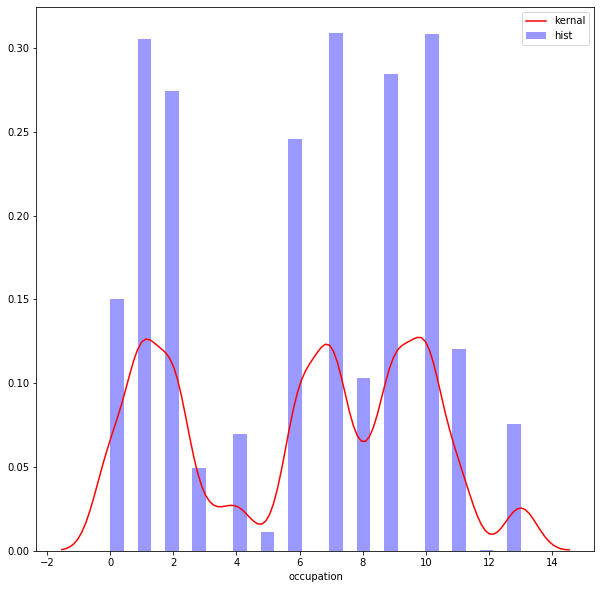

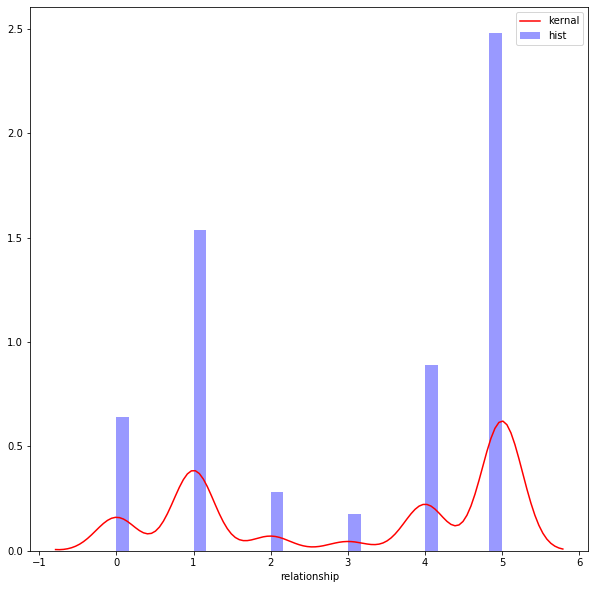

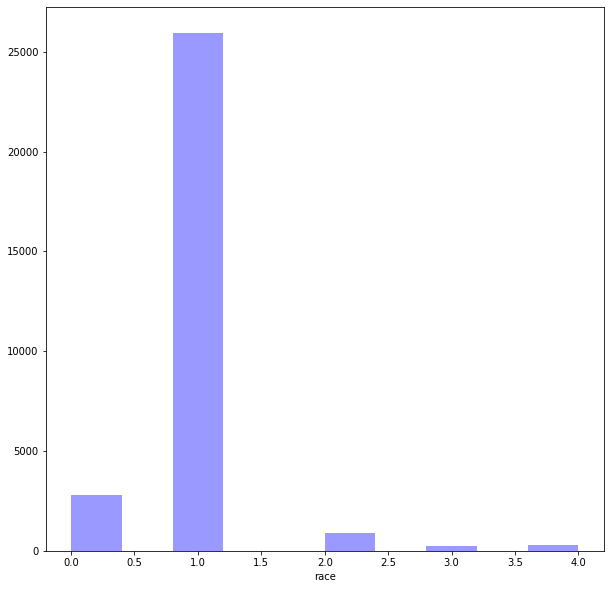

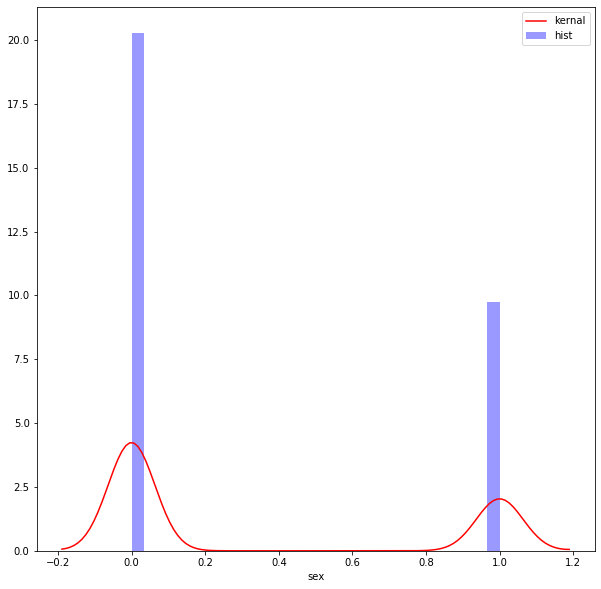

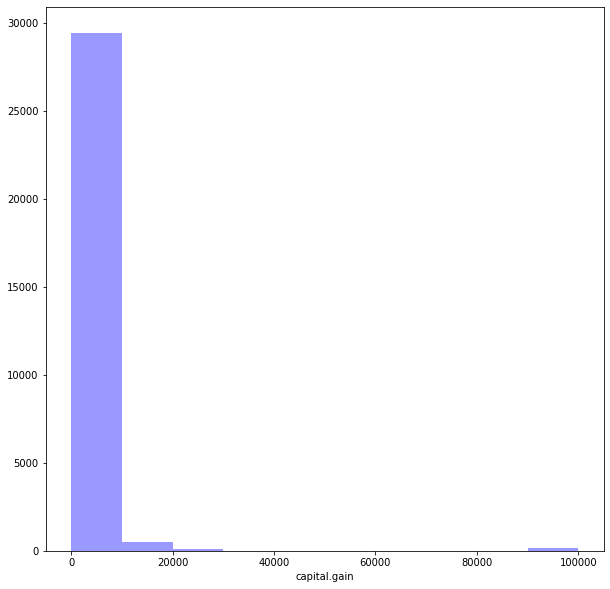

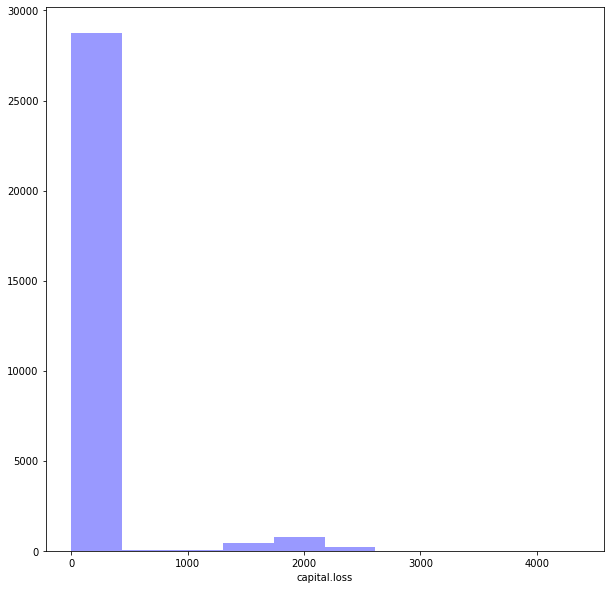

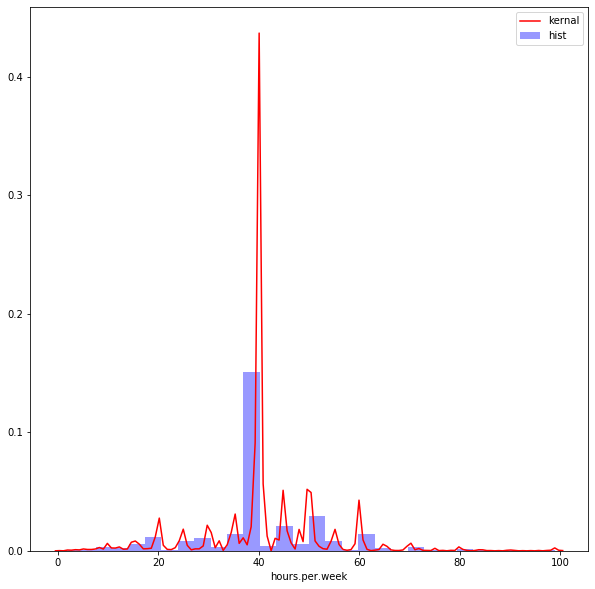

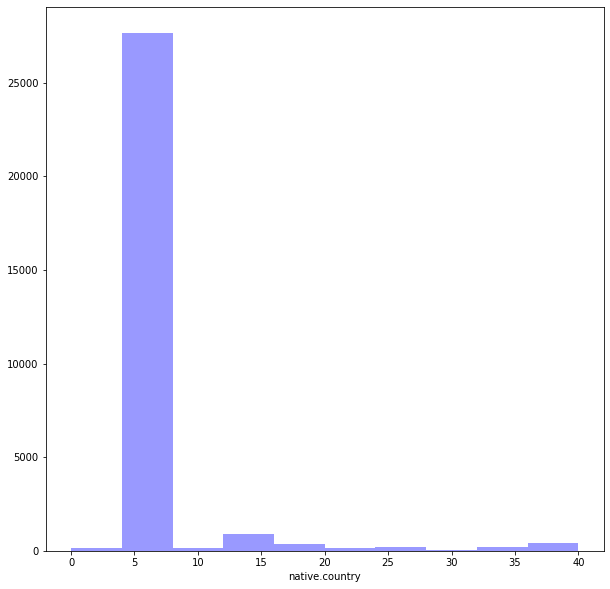

In [14]:
# посмотрим на распределения величин по признакам с помощью гистограмм и kde

l = [i for i in df_encoded.columns]

for i in range(len(l)):
    fig = plt.subplots(figsize=(10, 10))
    if i in [1,8,10,11,13]:
        sns.distplot(df_encoded[l[i]],bins = 10, kde=False,hist_kws={'color':'blue','label':'hist'}) 
    else:
        sns.distplot(df_encoded[l[i]],bins = 30, kde_kws={'color':'red','label':'kernal'}, 
            hist_kws={'color':'blue','label':'hist'})

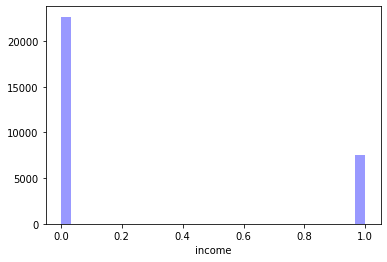

In [16]:
# посмотрим на распределение целевого признака 
sns.distplot(Income,bins = 30,  kde=False,hist_kws={'color':'blue','label':'hist'}) 

In [17]:
# посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью

df_encoded.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
age,1.000000,-0.144731,-0.076511,-0.106243,0.043526,0.333193,-0.021856,0.062563,-0.013121,-0.081993,0.080154,0.060165,0.101599,-0.003164
workclass,-0.144731,1.000000,0.037732,0.024363,0.017053,-0.120864,-0.026607,-0.107061,-0.034559,0.132677,-0.065209,-0.025823,-0.124397,-0.005615
fnlwgt,-0.076511,0.037732,1.000000,0.011592,-0.044992,-0.028510,-0.004218,-0.013589,-0.122877,-0.025362,0.000422,-0.009750,-0.022886,0.043848
education,-0.106243,0.024363,0.011592,1.000000,-0.168027,-0.080461,-0.004983,-0.014352,-0.007610,0.056270,-0.056268,-0.026213,-0.115359,0.008383
education.num,0.043526,0.017053,-0.044992,-0.168027,1.000000,0.048135,-0.142094,0.018294,0.030688,-0.006157,0.124416,0.079646,0.152522,-0.069589
marital.status,0.333193,-0.120864,-0.028510,-0.080461,0.048135,1.000000,-0.016885,0.664958,0.045460,-0.353630,0.072175,0.073432,0.155471,0.005724
occupation,-0.021856,-0.026607,-0.004218,-0.004983,-0.142094,-0.016885,1.000000,0.008433,0.004378,-0.065774,-0.037528,-0.027925,-0.016231,0.000241
relationship,0.062563,-0.107061,-0.013589,-0.014352,0.018294,0.664958,0.008433,1.000000,0.061932,-0.539945,0.054401,0.055586,0.104093,-0.007451
race,-0.013121,-0.034559,-0.122877,-0.007610,0.030688,0.045460,0.004378,0.061932,1.000000,-0.060132,0.010793,0.005351,0.029236,0.155889
sex,-0.081993,0.132677,-0.025362,0.056270,-0.006157,-0.353630,-0.065774,-0.539945,-0.060132,1.000000,-0.048814,-0.047011,-0.231268,-0.002995


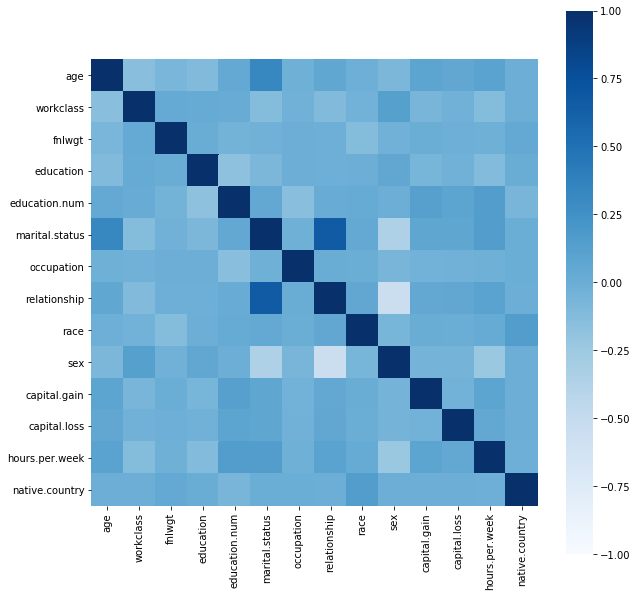

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_encoded.corr(), vmin=-1, cmap='Blues', square=True)
plt.show()

Таких признаков нет, датасет готов к дальнейшей работе